# Introduction

We'll use Fantasy Premier League dataset for our analysis. Yyou can find the raw data here:https://github.com/vaastav/Fantasy-Premier-League

There are several other datasets in this repository. You can take a look at others for better insights.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#../input/merged-all-gw/merged_all_gw.csv

/kaggle/input/merged-all-gw/merged_all_gw.csv


Let us import pandas and convert the csv file into a pandas dataframe

In [2]:
import pandas as pd

initial_df = pd.read_csv('../input/merged-all-gw/merged_all_gw.csv')

In [3]:
initial_df

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Aaron_Cresswell_376,0,0,7,0,1.5,376,8,5,0,...,0.0,0,0,0,0,0,50,True,0,1
1,Aaron_Lennon_430,0,0,3,0,0.0,430,3,0,0,...,3.0,0,1,0,0,0,50,True,0,1
2,Aaron_Mooy_516,0,0,0,0,0.0,516,7,0,0,...,0.0,0,0,0,0,0,50,False,0,1
3,Aaron_Ramsdale_494,0,0,11,0,0.0,494,2,1,0,...,1.0,0,2,0,0,0,45,True,0,1
4,Aaron_Wan-Bissaka_122,0,2,34,1,16.1,122,9,0,0,...,4.0,2,8,0,0,0,55,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22555,Youri_Tielemans_448,0,0,11,0,37.4,448,376,1,0,...,0.0,19,2,-3103,1905,5008,61,True,0,47
22556,Yves_Bissouma_53,0,0,22,0,1.3,53,372,1,1,...,1.0,7,7,77,147,70,50,False,0,47
22557,Zech_Medley_636,0,0,0,0,0.0,636,371,0,0,...,3.0,0,0,153,325,172,40,True,0,47
22558,Çaglar_Söyüncü_164,0,0,0,0,0.0,164,376,0,0,...,0.0,0,0,-95515,165,95680,49,True,0,47


So we can see that there are 22,650 rows and 33 colums in this dataset. There should be 38 GWs in the dataset as there are in the English Premier League. And the dataset contains different performance parameters of all the players for different gameweeks.

So, to analyse the performance of each players we need to group them by their names

In [4]:
grouped_df = initial_df.groupby('name')
grouped_df.first()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
name,,,,,,,,,,,,,,,,,,,,,
Aaron_Connolly_534,0,0,1,0,0.1,534,37,1,0,0.0,...,4.0,0,1,0,0,0,45,False,0,4
Aaron_Cresswell_376,0,0,7,0,1.5,376,8,5,0,1.1,...,0.0,0,0,0,0,0,50,True,0,1
Aaron_Lennon_430,0,0,3,0,0.0,430,3,0,0,0.2,...,3.0,0,1,0,0,0,50,True,0,1
Aaron_Mooy_516,0,0,0,0,0.0,516,7,0,0,0.0,...,0.0,0,0,0,0,0,50,False,0,1
Aaron_Ramsdale_494,0,0,11,0,0.0,494,2,1,0,1.0,...,1.0,0,2,0,0,0,45,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Youri_Tielemans_448,0,0,21,1,33.7,448,5,0,0,8.4,...,0.0,36,3,0,0,0,65,True,0,1
Yves_Bissouma_53,0,0,0,0,0.0,53,7,0,0,0.0,...,0.0,0,0,0,0,0,50,False,0,1
Zech_Medley_636,0,0,0,0,0.0,636,275,0,0,0.0,...,3.0,0,0,0,0,0,40,False,0,39


We have got the data grouped for each player. Let us just check for a single player.

In [5]:
grouped_df.get_group('Yves_Bissouma_53') 

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
523,0,0,0,0,0.0,53,7,0,0,0.0,...,0.0,0,0,0,0,0,50,False,0,1
1052,0,0,0,0,0.0,53,13,0,0,0.0,...,1.0,0,0,-29,23,52,50,True,0,2
1581,0,0,0,0,0.0,53,23,0,0,0.0,...,0.0,0,0,-22,10,32,50,True,0,3
2113,0,0,0,0,0.0,53,37,0,0,0.0,...,4.0,0,0,-20,9,29,50,False,0,4
2652,0,0,0,0,0.0,53,43,0,0,0.0,...,1.0,0,0,-5,21,26,50,True,0,5
3193,0,0,2,0,6.4,53,58,0,0,1.9,...,0.0,7,1,24,49,25,50,False,0,6
3739,0,0,3,0,2.3,53,63,0,0,0.2,...,2.0,0,1,24,71,47,50,False,0,7
4290,0,0,5,0,0.4,53,72,0,0,0.3,...,3.0,0,1,22,72,50,50,True,0,8
4845,0,0,0,0,0.0,53,81,0,0,0.0,...,2.0,0,0,20,75,55,50,False,0,9
5401,0,0,0,0,0.0,53,92,0,0,0.0,...,3.0,0,0,-17,29,46,50,True,0,10


Let us also check what all informations does this dataset provide us with, by printing  the column names.

In [6]:
initial_df.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [7]:
project='python-eda-fpl'

In [8]:
!pip install jovian --upgrade --quiet

In [10]:
import jovian
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/myhanshubham/python-eda-fpl


<IPython.core.display.Javascript object>

# Exploratory Analysis and Visualization

Before we can ask questions about how to get a better score in fantasy football, it would help to understand what the parameters i.e. total points, ict index, selected players percentage, education level, home away, etc. of the players look like. It's important to explore these variable in order to understand how the datas stack upon each other. And do they help in getting a better points total!

Let's begin by importing matplotlib.pyplot and seaborn.

In [137]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14

### Highest selected players

We will find out the players that were picked highest times across the whole season. For that we will group them by their names, and find a cumulative sum of their selected values.

In [13]:
selected_df = initial_df.groupby('name')[['selected']].sum()
selected_df
selected_df.reset_index(inplace=True)

top_s_df = selected_df.sort_values('selected', ascending=False)[:20]
top_s_df

,name,selected
376,Kevin_De Bruyne_215,122894883
641,Virgil_van Dijk_183,119071233
327,John_Lundstram_297,100372019
628,Trent_Alexander-Arnold_182,96056828
473,Mohamed_Salah_191,91794534
298,Jamie_Vardy_166,85006210
574,Sadio_Mané_192,77504230
538,Raheem_Sterling_214,73916785
609,Tammy_Abraham_460,70675882
435,Martin_Kelly_128,65450913


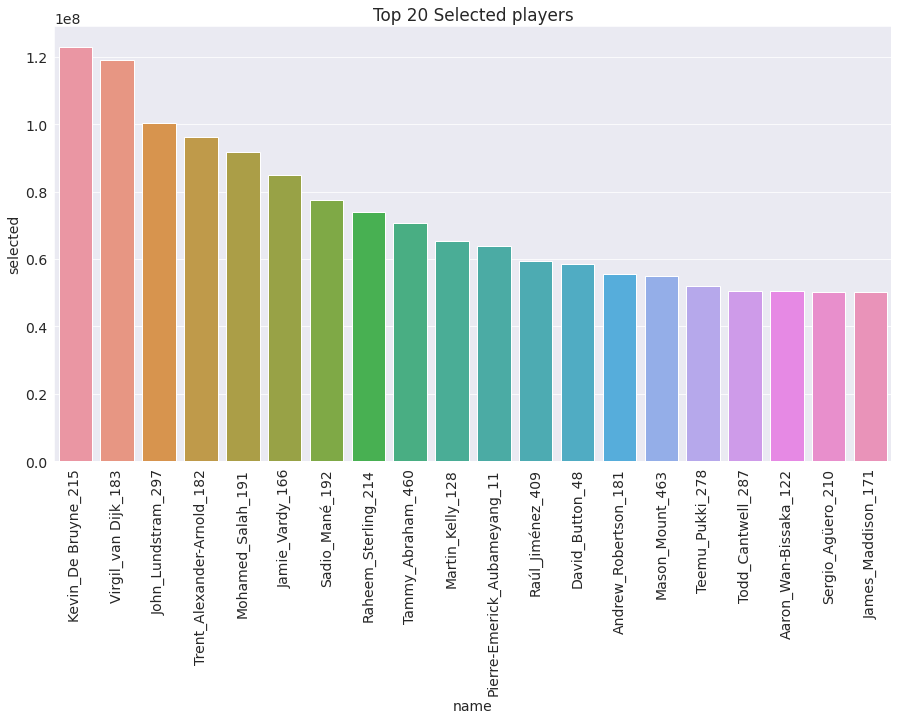

In [14]:
matplotlib.rcParams['figure.figsize'] = (15, 8)
sns.barplot(x='name',
            y='selected',
            data=top_s_df,
            order=top_s_df.sort_values('selected',ascending = False).name);
plt.xticks(rotation=90);
plt.title('Top 20 Selected players');

It appears the that some players appear in the top 20 without their teams being very highly rated or finishing at a better position in the league. So, people don't think it is necessarily a good idea to pick a player just because he is playing in a team that is ranked higher in the league.

### Highest ICT Index players

Fantasy Premier League provides with an ICT Index for each player. ICT standing for Influence, Creativity, Threat. We will see, who are the top 20 in that list. And are ther familiar names?

In [15]:
ict_df = initial_df.groupby('name')[['ict_index']].mean()
ict_df.reset_index(inplace=True)

top_ict_df = ict_df.sort_values('ict_index', ascending=False)[:20]
top_ict_df

,name,ict_index
376,Kevin_De Bruyne_215,11.079487
473,Mohamed_Salah_191,10.194737
101,Bruno Miguel_Borges Fernandes_618,9.942857
538,Raheem_Sterling_214,8.979487
541,Raúl_Jiménez_409,8.565789
415,Luke_Thomas_660,7.966667
152,Danny_Ings_313,7.955263
556,Roberto_Firmino_187,7.921053
653,Willian_Borges Da Silva_113,7.757895
574,Sadio_Mané_192,7.705263


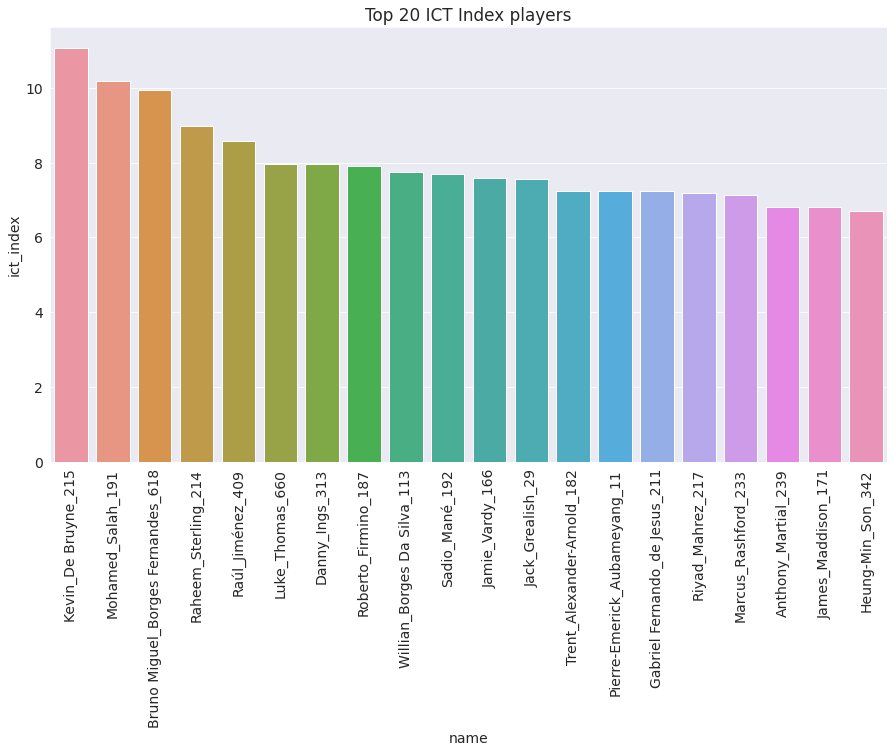

In [16]:
matplotlib.rcParams['figure.figsize'] = (15, 8)
sns.barplot(x='name',
            y='ict_index',
            data=top_ict_df,
            order=top_ict_df.sort_values('ict_index',ascending = False).name);
plt.xticks(rotation=90);
plt.title('Top 20 ICT Index players');

Therer are a few names that already appeared in top 20 list of selected players. But, some are not. Let's look at the top points list and then we will try and draw some conclusions.

### Players giving highest point returns

We will see, who are the top 20 players with highest point returns. And are ther familiar names?

In [17]:
pts_df = initial_df.groupby('name')[['total_points']].sum()
pts_df.reset_index(inplace=True)

top_pts_df = pts_df.sort_values('total_points', ascending=False)[:20]
top_pts_df

,name,total_points
376,Kevin_De Bruyne_215,251
473,Mohamed_Salah_191,233
574,Sadio_Mané_192,221
628,Trent_Alexander-Arnold_182,210
298,Jamie_Vardy_166,210
533,Pierre-Emerick_Aubameyang_11,205
538,Raheem_Sterling_214,204
56,Anthony_Martial_239,200
152,Danny_Ings_313,198
541,Raúl_Jiménez_409,194


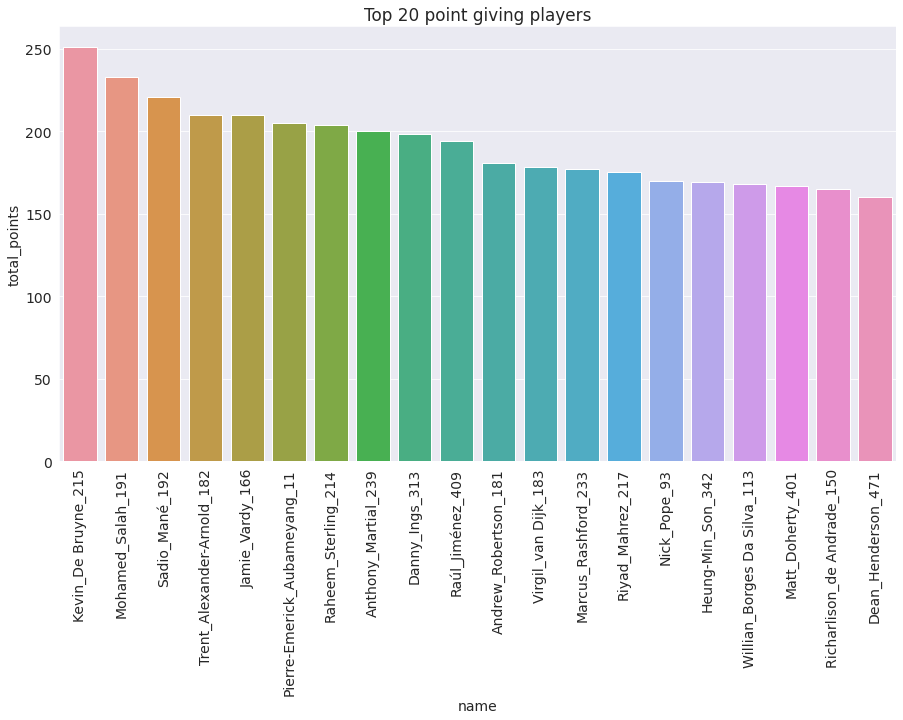

In [18]:
matplotlib.rcParams['figure.figsize'] = (15, 8)
sns.barplot(x='name',
            y='total_points',
            data=top_pts_df,
            order=top_pts_df.sort_values('total_points',ascending = False).name);
plt.xticks(rotation=90);
plt.title('Top 20 point giving players');

Interesting. Kevin De Bruyne and Salah seems to have topped every list so far. But the other players are in or out. But there are a lot of different players from the Top 20 selected players. Let's see how many of them are common.

We will find out the common players by merging the two dataframes.

In [19]:
intersected_df = pd.merge(top_s_df, top_pts_df, how='inner')
print(intersected_df)

                           name   selected  total_points
0           Kevin_De Bruyne_215  122894883           251
1           Virgil_van Dijk_183  119071233           178
2    Trent_Alexander-Arnold_182   96056828           210
3             Mohamed_Salah_191   91794534           233
4               Jamie_Vardy_166   85006210           210
5                Sadio_Mané_192   77504230           221
6           Raheem_Sterling_214   73916785           204
7  Pierre-Emerick_Aubameyang_11   63707775           205
8              Raúl_Jiménez_409   59378868           194
9          Andrew_Robertson_181   55667478           181


Ok. There are 10 players in common. So, there is some chance that most selected players will also give the most amount of points.

But can we just find it from ICT index and not look at how many people selected them at all? Let's merge and see the results.

In [20]:
intersected_df = pd.merge(top_pts_df, top_ict_df, how='inner')
print(intersected_df)

                            name  total_points  ict_index
0            Kevin_De Bruyne_215           251  11.079487
1              Mohamed_Salah_191           233  10.194737
2                 Sadio_Mané_192           221   7.705263
3     Trent_Alexander-Arnold_182           210   7.244737
4                Jamie_Vardy_166           210   7.600000
5   Pierre-Emerick_Aubameyang_11           205   7.241026
6            Raheem_Sterling_214           204   8.979487
7            Anthony_Martial_239           200   6.823684
8                 Danny_Ings_313           198   7.955263
9               Raúl_Jiménez_409           194   8.565789
10           Marcus_Rashford_233           177   7.139474
11              Riyad_Mahrez_217           175   7.174359
12             Heung-Min_Son_342           169   6.700000
13   Willian_Borges Da Silva_113           168   7.757895


Wow! 14 players in common with ICT index in top 20. It seems that looking at ICT Index to pick players is more beneficial.

In [21]:
import jovian
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/myhanshubham/python-eda-fpl


<IPython.core.display.Javascript object>

# Finding some Answers

We've gained some insights about the dataset and FPL in general, simply by exploring a few columns of the dataset. Let's ask some specific questions, and try to answer them using data frame operations and interesting visualizations.

**Q: Which part of ICT index is more relevant Influence, Creativity or Threat?**

For that we will first extract the required columns and put them in one dataframe.

In [66]:
ict_single_df = initial_df.groupby('name')[['influence', 'creativity', 'threat', 'total_points']].sum()
ict_single_df.reset_index(inplace=True)
ict_single_df

,name,influence,creativity,threat,total_points
0,Aaron_Connolly_534,150.6,91.4,530,61
1,Aaron_Cresswell_376,535.4,441.0,180,79
2,Aaron_Lennon_430,45.0,37.8,12,15
3,Aaron_Mooy_516,437.8,614.9,291,80
4,Aaron_Ramsdale_494,973.6,24.0,0,126
...,...,...,...,...,...
661,Youri_Tielemans_448,569.6,809.4,501,117
662,Yves_Bissouma_53,238.8,110.6,101,39
663,Zech_Medley_636,0.0,0.0,0,0
664,Çaglar_Söyüncü_164,757.0,79.0,238,120


Now let us first plot **Influence vs Total Points** and check whether there is some kind of correlation or not.

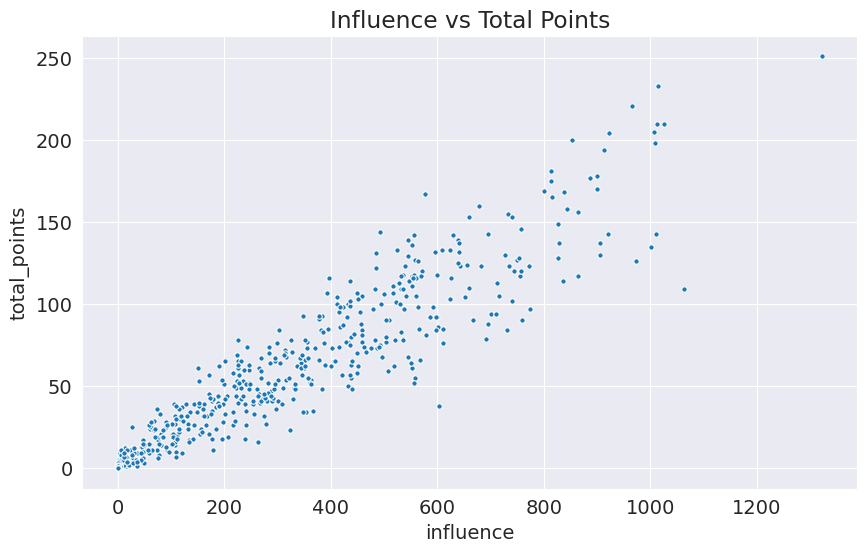

In [55]:
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.scatterplot(ict_single_df['influence'], ict_single_df['total_points'], s=15);
plt.title('Influence vs Total Points');

Clearly they have a positive correlation.

Let's find out about Creativity.

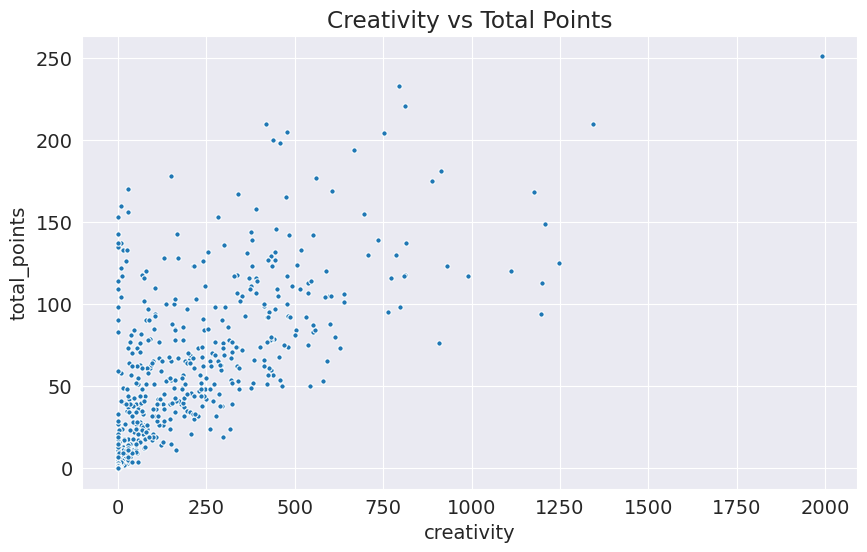

In [58]:
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.scatterplot(ict_single_df['creativity'], ict_single_df['total_points'], s=15);
plt.title('Creativity vs Total Points');

They have a positive correlation too. But certainly seems like Influence had a stronger correlation.


Let's find out how does Threat fair!

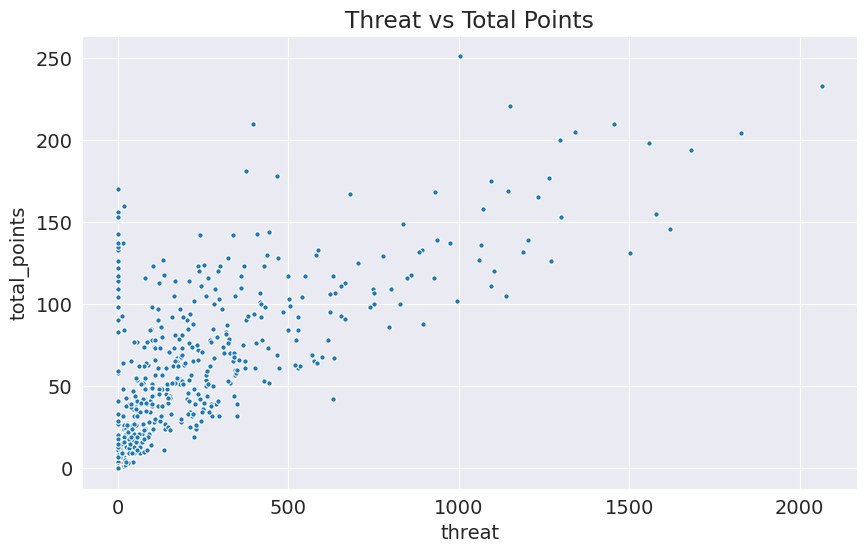

In [60]:
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.scatterplot(ict_single_df['threat'], ict_single_df['total_points'], s=15);
plt.title('Threat vs Total Points');

It's similar to creativity too.

So, intuitively from seeing the graphs we can say that Influence is a better metric for chosing players than Creativity or Threat. But wouldn't a quantitive measurement be better. Let's find out Pearson's coefficient and see which is a better metric.

In [138]:
from scipy.stats import pearsonr 
  
# Convert dataframe into series 
list1 = ict_single_df['influence'] 
list2 = ict_single_df['total_points'] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation Influence vs Points: %.3f' % corr) 

Pearsons correlation Influence vs Points: 0.949


In [139]:
# Convert dataframe into series 
list1 = ict_single_df['creativity'] 
list2 = ict_single_df['total_points'] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation Creativity vs Points: %.3f' % corr) 

Pearsons correlation Creativity vs Points: 0.714


In [140]:
# Convert dataframe into series 
list1 = ict_single_df['threat'] 
list2 = ict_single_df['total_points'] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation Threat vs Points: %.3f' % corr) 

Pearsons correlation Threat vs Points: 0.748


Again we find that Influence is definitely a much better metric to judge the player's points return capability, since it has the highest value among the three metrics. So, next time while choosing players for your team, you can not only depend on ICT index. But rank according to influence for a better points total.

In [141]:
import jovian
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/myhanshubham/python-eda-fpl


<IPython.core.display.Javascript object>

**Q: Does Home or Away fixture matter in terms of points?**

For that we will again extract the required columns and put them in one dataframe.

In [71]:
h_a_df = initial_df.groupby('was_home')[['total_points']].sum()
h_a_df.reset_index(inplace=True)
h_a_df

,was_home,total_points
0,False,14261
1,True,16751


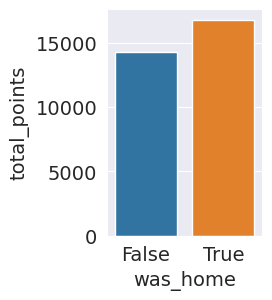

In [81]:
matplotlib.rcParams['figure.figsize'] = (2, 3)
sns.barplot(x='was_home',
            y='total_points',
            data=h_a_df);
plt.xticks(rotation=0);

Here we see that home as a slight advantage over Away fixtures. Although it is not a huge advantage with selecting players with home fixtures but still when competing with millions of FPL managers. Probably the smallest of advantages do matter in the end.


But let's take a look at  the distribution to find if anything is being missed by looking only at totals.

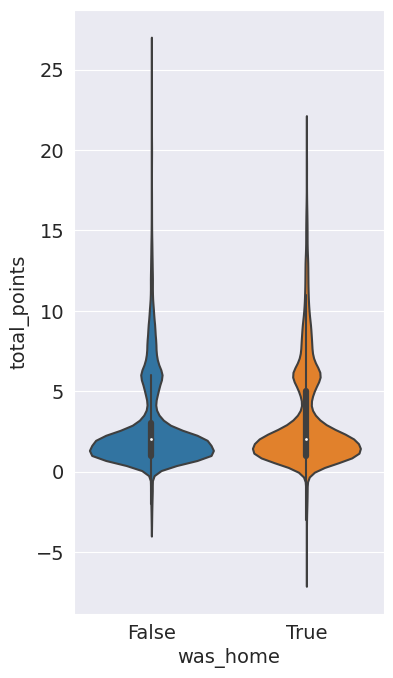

In [116]:
matplotlib.rcParams['figure.figsize'] = (4, 8)

ini_df = initial_df[(initial_df['total_points'] != 0)]
ini_df

p = sns.violinplot(data=ini_df,
                   x = 'was_home',
                   y = 'total_points')

And, there are a few changes from the histograms already. You can see that there is a stark difference in the distribution. We have removed the zero values. And we see that ther are some more positive outliers in the Away cases than Home. Whereas, home has more negative outliers than Away.

They do have almost similar means. But away sides do have a smaller distribution than home sides. So, picking home side players might be of some advantage. But not something very huge.

**Q: Are costly players better?**

Another variable to consider when analyzing points is price. I typically assume the market is efficient in pricing players and there should therefore be a strong relationship between price and points. However, it is always best to investigate.

Let's price against points as well.

In [84]:
value_df = initial_df.groupby('name')[['value', 'total_points']].sum()
value_df.reset_index(inplace=True)
value_s_df = value_df.sort_values('value', ascending=False)[:20]
value_s_df

,name,value,total_points
473,Mohamed_Salah_191,4740,233
538,Raheem_Sterling_214,4639,204
588,Sergio_Agüero_210,4634,132
574,Sadio_Mané_192,4598,221
533,Pierre-Emerick_Aubameyang_11,4265,205
244,Harry_Kane_338,4145,158
376,Kevin_De Bruyne_215,4038,251
224,Gabriel Fernando_de Jesus_211,3729,146
254,Heung-Min_Son_342,3701,169
298,Jamie_Vardy_166,3645,210


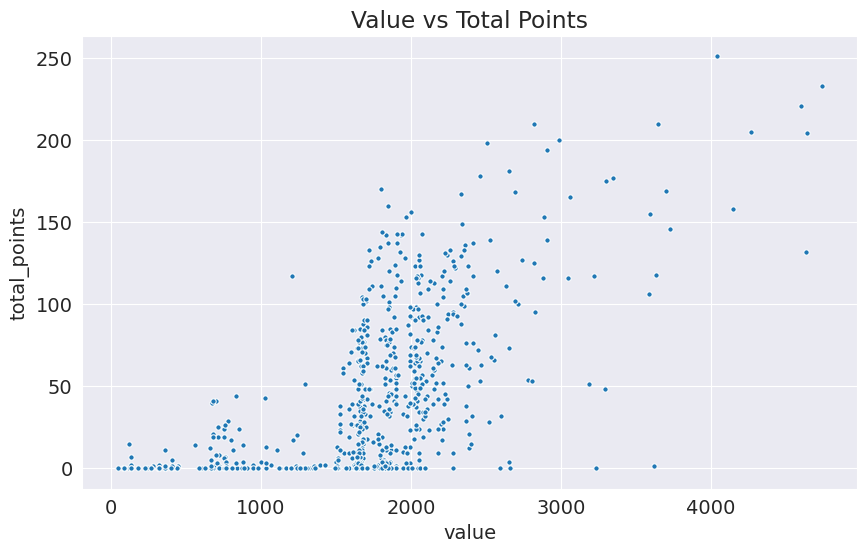

In [87]:
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.scatterplot(value_df['value'], value_df['total_points'], s=15);
plt.title('Value vs Total Points');

There are too many zero values for total points which are disturbing the analysis. Maybe they were transfered out just after the season started but the players kept on being there on the data list.

Just like Romelu Lukaku. Or some of them might have been injured and hence giving zero points. Let's remove the zero values and plot it again.

In [92]:
val_df = value_df[(value_df != 0).all(1)]
val_df

,name,value,total_points
0,Aaron_Connolly_534,1550,61
1,Aaron_Cresswell_376,1795,79
2,Aaron_Lennon_430,1789,15
3,Aaron_Mooy_516,1829,80
4,Aaron_Ramsdale_494,1735,126
...,...,...,...
660,Yoshinori_Muto_260,1975,9
661,Youri_Tielemans_448,2413,117
662,Yves_Bissouma_53,1900,39
664,Çaglar_Söyüncü_164,1853,120


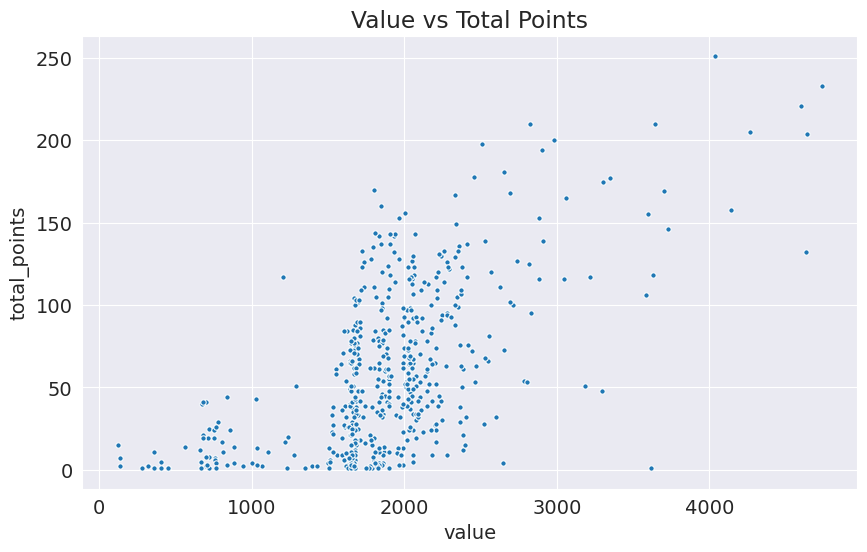

In [93]:
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.scatterplot(val_df['value'], val_df['total_points'], s=15);
plt.title('Value vs Total Points');

There is a strong, positive relationship between value of the players and points. Most players are clustered around 2000 value and between zero and 100 points. 

And we also see there are very few players going above 150 points with values lower than 2000. Identifying such players and bringing them early in the team should be the way to go. But overall costly players are always better.

So putting costly players in and then filling the other spots with whatever you can fit is a good strategy to follow rather than filling it with large number of average priced players. Since, over the course of full season. They almost give same amount of points.

**Q: Does Bonus points really matter?**

So, in FPL Bonus points are given to every player on the field according to their various actions. And that player action data is taken from Opta data. And the top 3 bonus points scorer are given 3,2 or 1 according to their ranks in a particular match.

So, intuition tells that players getting more bonus points should also get more total points. I'm sure for the top players this is true. But for mid-range to lower players that is a bit difficult to predict.

Let's try and find out, to Bonus points actually amount in higher points.

In [118]:
bp_df = initial_df.groupby('name')[['bps', 'total_points']].sum()
bp_df.reset_index(inplace=True)
bps_df = bp_df.sort_values('total_points', ascending=False)[:10]
bps_df

,name,bps,total_points
376,Kevin_De Bruyne_215,988,251
473,Mohamed_Salah_191,661,233
574,Sadio_Mané_192,689,221
628,Trent_Alexander-Arnold_182,904,210
298,Jamie_Vardy_166,775,210
533,Pierre-Emerick_Aubameyang_11,807,205
538,Raheem_Sterling_214,642,204
56,Anthony_Martial_239,544,200
152,Danny_Ings_313,736,198
541,Raúl_Jiménez_409,685,194


Already by looking at the top 10 it doesn't seem that anybody who is playing well according to his position(Opta points give the idea of how one played in his position) isn't always resulting in a high points return.

Probably a scatter plot makes more sense to see the trend. Or absence of trend here.

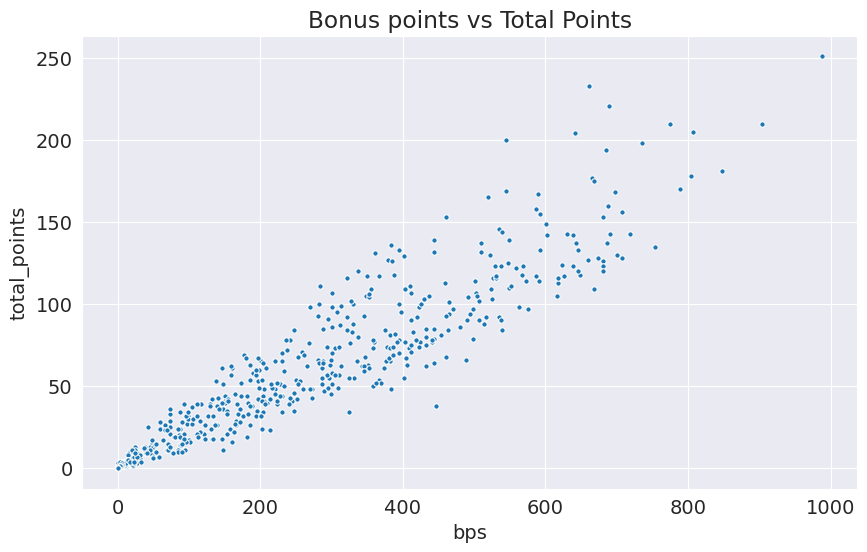

In [120]:
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.scatterplot(bp_df['bps'], bp_df['total_points'], s=15);
plt.title('Bonus points vs Total Points');

Ok. There is a direct correlation between bonus points and total points in a larger scale than 10(i.e. what we did earlier).
So, although total points is not always a reflection of bonus points. But overall it is somewhat true.

**Q: Who were the most value for money assets?**

We will have to find out who had better points ver value stat for that to be found out.

In [127]:
tp_df = initial_df.groupby('name')[['total_points']].sum()
tp_df.reset_index(inplace=True)
mv_df = initial_df.groupby('name')[['value']].mean()
mv_df.reset_index(inplace=True)

In [128]:
merged_df = pd.merge(tp_df, mv_df, how='inner')
merged_df

,name,total_points,value
0,Aaron_Connolly_534,61,44.285714
1,Aaron_Cresswell_376,79,47.236842
2,Aaron_Lennon_430,15,47.078947
3,Aaron_Mooy_516,80,48.131579
4,Aaron_Ramsdale_494,126,45.657895
...,...,...,...
661,Youri_Tielemans_448,117,63.500000
662,Yves_Bissouma_53,39,50.000000
663,Zech_Medley_636,0,40.000000
664,Çaglar_Söyüncü_164,120,48.763158


In [130]:
# merged_df['ppv'] = value_df.value.cumsum()

merged_df['ppv'] = merged_df.total_points / merged_df.value
print(merged_df.head())

                  name  total_points      value       ppv
0   Aaron_Connolly_534            61  44.285714  1.377419
1  Aaron_Cresswell_376            79  47.236842  1.672423
2     Aaron_Lennon_430            15  47.078947  0.318614
3       Aaron_Mooy_516            80  48.131579  1.662110
4   Aaron_Ramsdale_494           126  45.657895  2.759654


In [131]:
top_ppv_df =merged_df.sort_values('ppv', ascending=False)[:20]
top_ppv_df

,name,total_points,value,ppv
496,Nick_Pope_93,170,47.394737,3.586896
170,Dean_Henderson_471,160,48.657895,3.288264
327,John_Lundstram_297,144,47.526316,3.029900
152,Danny_Ings_313,198,66.026316,2.998804
367,Kasper_Schmeichel_168,156,52.684211,2.961039
565,Rui Pedro_dos Santos Patrício_411,153,51.710526,2.958779
230,George_Baldock_294,142,48.210526,2.945415
325,John_Egan_295,133,45.289474,2.936665
443,Mathew_Ryan_47,135,47.210526,2.859532
434,Martin_Dubravka_262,143,50.236842,2.846517


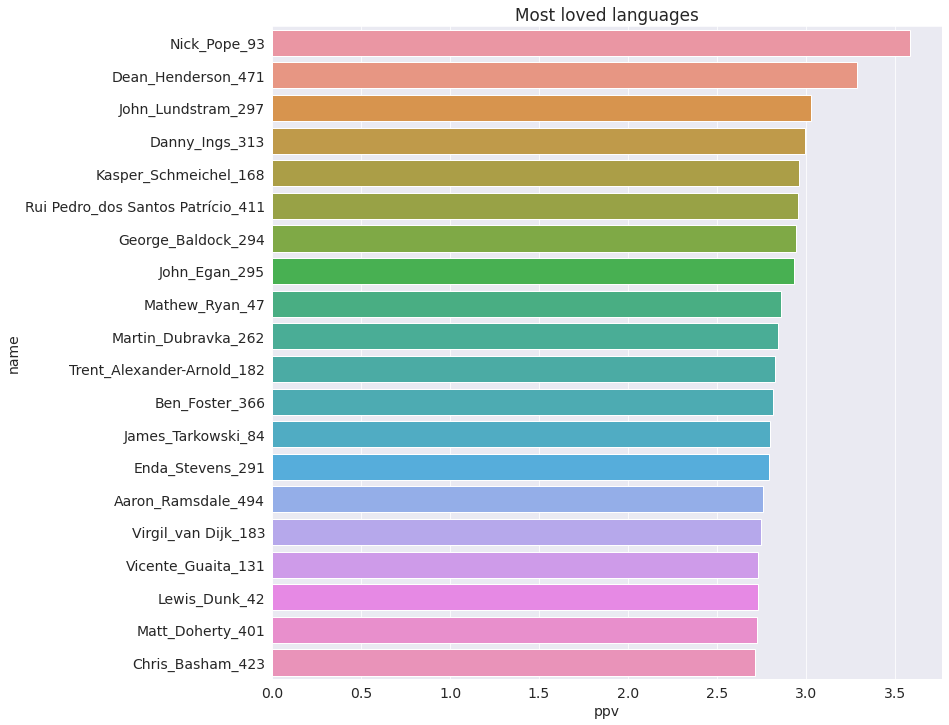

In [147]:
plt.figure(figsize=(12, 12))
sns.barplot(top_ppv_df.ppv, top_ppv_df.name)
plt.title("Most value players");
plt.xlabel('ppv');

There are actually many new names. Let's check whether any of them are from the top 20 points scorers.

In [132]:
intersected_df = pd.merge(top_pts_df, top_ppv_df, how='inner')
print(intersected_df)

                         name  total_points      value       ppv
0  Trent_Alexander-Arnold_182           210  74.263158  2.827782
1              Danny_Ings_313           198  66.026316  2.998804
2         Virgil_van Dijk_183           178  64.710526  2.750712
3                Nick_Pope_93           170  47.394737  3.586896
4            Matt_Doherty_401           167  61.315789  2.723605
5          Dean_Henderson_471           160  48.657895  3.288264


There are a few players but mostly other players have topped the charts.

**Q: Does being a value asset mean that total points is also high?**

For that, we need to plot Points per value vs Total points and see whether there is a correlation or not.

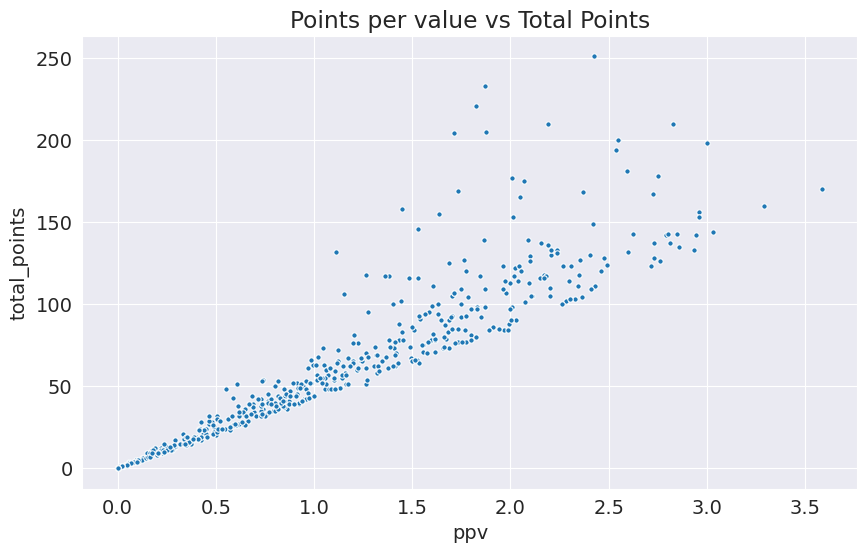

In [133]:
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.scatterplot(merged_df['ppv'], merged_df['total_points'], s=15);
plt.title('Points per value vs Total Points');

This looks like the players are mostly priced correctly. But as higher we go on total points. We see that there is more deviation in terms of points per value.

# Inferences and Conclusions

We have found out many interesting insights of managing a FPL team.
- High percentage selected players come mostly from higher ranked teams in the real Premier League.
- Players having high ICT indexes generally result in high points. So, it is a good practice to have players with better ICT Index rank.
- It is seen that in ICT index, Influence rating is much more relevant in terms of getting more points than Creativity or Threat.
- Home or Away fixture doesn't really affect the points. But Home fixtures do have a very slight edge. So, if you want that slight edge maybe go for the Home fixture players.
- In general costly players are always better than mid-range or low-range players. But there are some mid-range players who are as good as high-range ones. Early detection of such players and transferring them in would be a good move. Also sometimes people get confused, whether they should go for some costly players and fill others with just okay players. Or get a team full of mid-range players. It is seen that the former strategy works better.
- Players actually playing well also generally give high points. There are some discrepancies, but mostly the correlation is linear.

# References and Future Work

There's a lot of insights to be gained using the survey, and we've barely scratched the surface. Here are some ideas for further exploration:

- Repeat the analysis for different positioned players and compare the results.
- Get the form data. Merge it with the current dataset and find out whether form or fixture is a better parameter for transfers.

- Use some Machine Learning model to predict the points for next gameweek.



References:
- Fantasy Premier League Data: https://github.com/vaastav/Fantasy-Premier-League
- Premier League Fantasy Data Analysis in R: https://feathersanalytics.com/fantasy-analysis-part-one/
- Matplotlib, Seaborn, Pandas documentations

In [142]:
import jovian
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/myhanshubham/python-eda-fpl


<IPython.core.display.Javascript object>